# The DBSCAN Algorithm

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

# What is DBSCAN Algorithm

Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two parameters:

* **minPts**: The minimum number of points (a threshold) clustered together for a region to be considered dense.
* **eps (ε):** A distance measure that will be used to locate the points in the neighborhood of any point.

These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

**Reachability** in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

**Connectivity,** on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

There are three types of points after the DBSCAN clustering is complete:

<img src="https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png"/>

* **Core** — This is a point that has at least m points within distance n from itself.
* **Border** — This is a point that has at least one Core point at a distance n.
* **Noise** — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

## The Algorithm's Steps

* The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).
* If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.
* The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point

## Selecting Parameters

DBSCAN is sensitive to the minPts and eps value. Here is a method to select them:

### MinPts

As a starting point, a minimum n can be derived from the number of dimensions D in the data set, as n ≥ D + 1. For data sets with noise, larger values are usually better and will yield more significant clusters. Hence, n = 2·D can be evaluated, but it may even be necessary to choose larger values for very large data.

Here are a few rules of thumb:
* The larger the data set, the larger the value of MinPts should be
* If the data set is noisier, choose a larger value of MinPts

### Eps (ε)

After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is to use the K nearest neighbors distance. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

Here's how to do it: 

**Step 1:** Calculate the average distance between each point in the data set and its 20 nearest neighbors (my selected MinPts value).
```python
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
```
**Step 2:** Sort distance values by ascending value and plot
```python
distances = np.sort(distances, axis=0)
distances = distances.mean(axis=1)
plt.plot(distances)
````

### Distance Function

By default, DBSCAN uses Euclidean distance, although other methods can also be used (like great circle distance for geographical data). The choice of distance function is tightly linked to the choice of epsilon (ε) value and has a major impact on the outcomes. Hence, the distance function needs to be chosen appropriately based on the nature of the data set. 

## Advantages

* Does not require to specify number of clusters beforehand.
* Performs well with arbitrary shapes clusters.
* DBSCAN is robust to outliers and able to detect the outliers.

## Disadvantages

* In some cases, determining an appropriate distance of neighborhood (eps) is not easy and it requires domain knowledge.
* If clusters are very different in terms of in-cluster densities, DBSCAN is not well suited to define clusters. The characteristics of clusters are defined by the combination of eps-minPts parameters. Since we pass in one eps-minPts combination to the algorithm, it cannot generalize well to clusters with much different densities.
* Since it uses k-NN algorithm to estimate eps and even internally to find clusters, it can be slow and may not be suitable for large datasets.

# DBSCAN on Random Data

Now we would be using the algorithm on random data. 

First let's import the libraries

In [16]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Data generation

Next would be data generation

In [17]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation,
                      cluster_std=clusterDeviation)

    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [18]:
X, y = createDataPoints([[4, 3], [2, -1], [-1, 4]], 1500, 0.5)

## Modeling

Now we would be creating our model.

### Selecting Parameters 

Since we have 2 dimensions, we will choose minPts to be 4. 

Let's find out the values of eps. 

In [20]:
from sklearn.neighbors import NearestNeighbors

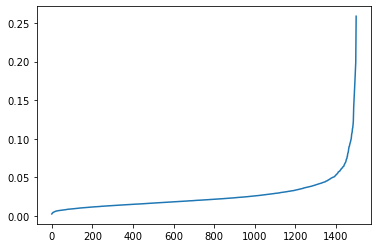

In [31]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances.mean(axis=1)
plt.plot(distances)

Now, we need to zoom in. 

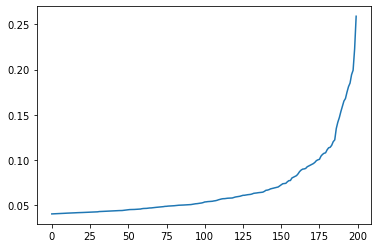

In [32]:
plt.plot(distances[1300:])

So around 0.13 it seems.

In [33]:
epsilon = 0.13
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 0, 2, 0], dtype=int64)

### Distinguish outliers

Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.


In [34]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [36]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Data visualization


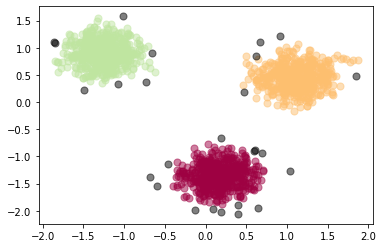

In [42]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker=u'o', alpha=0.5)

That seems like a good results. As of outliers (marked by black), whether that's desirable or not depends on the problem. If they should be included, dataset would be considered noisy and increasing value of eps should be considered.

# Author 

By Abhinav Garg